#### Goal:

Identify the most suitable candidates based on their LinkedIn headline with respect to input searh tags utilizing NLP tecniques assessing a similarity score.

Accomodate a supervisor signal to choose the most suitable candidate from the initial recommensations to generate new results. 

In [14]:
import pandas as pd
import re

#### Dataset with potential HR talent

In [15]:
data = pd.read_csv("D:\\Apziva\\potential-talents.csv")

In [16]:
data.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [17]:
data.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [19]:
for var in data.job_title:
    print(var)

2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional
Native English Teacher at EPIK (English Program in Korea)
Aspiring Human Resources Professional
People Development Coordinator at Ryan
Advisory Board Member at Celal Bayar University
Aspiring Human Resources Specialist
Student at Humber College and Aspiring Human Resources Generalist
HR Senior Specialist
Student at Humber College and Aspiring Human Resources Generalist
Seeking Human Resources HRIS and Generalist Positions
Student at Chapman University
SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR
Human Resources Coordinator at InterContinental Buckhead Atlanta
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional
Native English Teacher at EPIK (English Program in Korea

#### NLP Techniques to perform the required function:

In [20]:
# Search tag based on which we can assess similarity with headlines
search_tag = input("Enter the appropriate headline: ")

Enter the appropriate headline: seeking aspiring human resources


In [21]:
# Function to generate the recommendation result
def get_recommendation(top, data, scores):
    recommendation = pd.DataFrame(columns = ['id', 'job_title',  'location','connections', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'id'] = data['id'][i]
        recommendation.at[count, 'job_title'] = data['job_title'][i]
        recommendation.at[count, 'location'] = data['location'][i]
        recommendation.at[count, 'connections'] = data['connection'][i]
        recommendation.at[count, 'score'] =  scores[count]
        count += 1
    return recommendation    

In [22]:
# Function to sort generated recommendaton based on number of connections
def connections_based_sort(data):
    grouped = data.groupby('job_title')
    sorted_df = pd.DataFrame(columns = data.columns)
    for name, group in grouped:
        new_group = group.sort_values(by=['connections'])
        sorted_df = sorted_df.append(new_group, ignore_index=True)
    return sorted_df

##### TFIDF with Cosine Similarity

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
data['job_title'].fillna(' ')

0      2019 C.T. Bauer College of Business Graduate (...
1      Native English Teacher at EPIK (English Progra...
2                  Aspiring Human Resources Professional
3                 People Development Coordinator at Ryan
4        Advisory Board Member at Celal Bayar University
                             ...                        
99     Aspiring Human Resources Manager | Graduating ...
100                Human Resources Generalist at Loparex
101     Business Intelligence and Analytics at Travelers
102                       Always set them up for Success
103     Director Of Administration at Excellence Logging
Name: job_title, Length: 104, dtype: object

In [24]:
tfidf_matrix = tfidf.fit_transform((data['job_title']))
tfidf_matrix.shape

(104, 181)

In [25]:
search_list = [search_tag]
user_df = pd.DataFrame(search_list)
user_df.columns = ['search_key']
user_tfidf = tfidf.transform(user_df['search_key'])

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x), tfidf_matrix)
output = list(cos_similarity_tfidf)

In [27]:
top_idx = sorted(range(len(output)), key=lambda i: output[i], reverse=True)[:20]
list_scores = [output[i][0][0] for i in top_idx]
recommendation = get_recommendation(top_idx, data, list_scores)
recommendation

,id,job_title,location,connections,score
0,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,0.668821
1,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.57643
2,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.57643
3,99,Seeking Human Resources Position,"Las Vegas, Nevada Area",48,0.559021
4,27,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,0.549321
5,29,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,0.549321
6,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.542767
7,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.542767
8,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.542767
9,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.542767


##### Count Vectorizer with Cosine Similarity

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [29]:
count_jobtitle = count_vectorizer.fit_transform((data['job_title']))

In [30]:
user_cv = count_vectorizer.transform(user_df['search_key'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_cv, x), count_jobtitle)
output2 = list(cos_similarity_countv)

In [31]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:20]
list_scores = [output2[i][0][0] for i in top]
recommendation = get_recommendation(top, data, list_scores)
recommendation

,id,job_title,location,connections,score
0,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,0.83205
1,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.75
2,6,Aspiring Human Resources Specialist,Greater New York City Area,61,0.75
3,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.75
4,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.75
5,24,Aspiring Human Resources Specialist,Greater New York City Area,1,0.75
6,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.75
7,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.75
8,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.75
9,36,Aspiring Human Resources Specialist,Greater New York City Area,390,0.75


##### spaCy's core english model - en_core_web_lg

In [140]:
# English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. 
# Assigns word vectors, POS tags, dependency parses and named entities.

In [141]:
import spacy
# !python -m spacy download en_core_web_lg
import en_core_web_lg
nlp = en_core_web_lg.load()

In [142]:
# Transform the copurs text to the spacy's documents
import timeit
start_time = timeit.default_timer()
list_docs = []
for i in range(len(data)):
    doc = nlp("u'" + data['job_title'][i] + "'")
    list_docs.append((doc,i))
print(len(list_docs))
elapsed = timeit.default_timer() - start_time
print(elapsed,"seconds")

104
1.0969972999992024 seconds


In [143]:
# list_docs

In [144]:
def similarity_score_spacy(nlp, df, user_text):
    # Calculate similarity using spaCy
    simlarity_df = []
    search_key = nlp("u'" + user_text + "'")
    for i in df.index:
            headline = list_docs[i][0]
            # compute a semantic similarity estimate - cosine over vectors aka word embeddings
            score = search_key.similarity(headline)
            simlarity_df.append((search_key, headline, list_docs[i][1],score))
    return simlarity_df

In [145]:
# simlarity_df

In [146]:
import timeit
start_time = timeit.default_timer()
simlarity_df = similarity_score_spacy(nlp, data, search_tag)
elapsed = timeit.default_timer() - start_time
print(elapsed,"seconds")

0.05256739999822457 seconds


In [147]:
spacy_recommendation_sorted = pd.DataFrame(simlarity_df).sort_values([3], ascending=False).head(20)
spacy_recommendation_sorted.reset_index(inplace=True)

In [148]:
# spacy_recommendation_sorted

In [149]:
index_spacy = spacy_recommendation_sorted[2]
list_scores = spacy_recommendation_sorted[3]

In [150]:
recommendation = get_recommendation(index_spacy, data, list_scores)
recommendation

,id,job_title,location,connections,score
0,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
1,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
3,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
4,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,0.927753
5,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
6,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
7,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.920582
8,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.920582
9,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.891912


##### Nearest Neighbors - Unsupervised learner for neighbor searches

In [151]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 21
KNN = NearestNeighbors(n_neighbors, p=2) # p = 2 for euclidean_distance
KNN.fit(tfidf_matrix)
NNs = KNN.kneighbors(user_tfidf, return_distance=True)

In [152]:
print(NNs)
print(NNs[0][0][1:])
print(NNs[1][0][1:])

(array([[0.8138536 , 0.92040185, 0.92040185, 0.93912626, 0.94939912,
        0.94939912, 0.95627714, 0.95627714, 0.95627714, 0.95627714,
        0.95627714, 0.95627714, 0.95627714, 0.99894322, 0.99894322,
        0.99894322, 0.99894322, 0.99894322, 1.07390628, 1.07390628,
        1.07390628]]), array([[72, 29, 27, 98, 28, 26, 45,  2, 96, 32, 57, 16, 20, 35, 23, 59,
         5, 48,  9, 52, 61]], dtype=int64))
[0.92040185 0.92040185 0.93912626 0.94939912 0.94939912 0.95627714
 0.95627714 0.95627714 0.95627714 0.95627714 0.95627714 0.95627714
 0.99894322 0.99894322 0.99894322 0.99894322 0.99894322 1.07390628
 1.07390628 1.07390628]
[29 27 98 28 26 45  2 96 32 57 16 20 35 23 59  5 48  9 52 61]


In [153]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

recommendation = get_recommendation(index_spacy, data, list_scores)
recommendation

,id,job_title,location,connections,score
0,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
1,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
3,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
4,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,0.927753
5,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
6,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.927753
7,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.920582
8,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.920582
9,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.891912


In [61]:
rf = connections_based_sort(recommendation)
rf 

,id,job_title,location,connections,score
0,29,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,0.940339
1,27,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,0.940339
2,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,0.916033
3,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,0.981232
4,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.915035
5,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.915035
6,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442
7,60,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442
8,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442
9,49,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442


##### Fast Text

In [102]:
# Defining the corpus for fastText implementation
corpus = []
for headline in data["job_title"]:
    corpus.append(headline.split())
    
def replace_special_char(word, toBeReplaced, void):
    for elem in toBeReplaced :
        if elem in word :
            word = word.replace(elem, void)
    return word

for sentence in corpus:
    for word in range(len(sentence)):
        sentence[word] = replace_special_char(sentence[word], ['[', ']','(',')','.','|','&'] , "").lower()

In [103]:
import timeit
from gensim.models import FastText
start_time = timeit.default_timer()
ft_model = FastText(corpus, sg = 1) #using default values for embedding size, window, min_count and down sampling
elapsed = timeit.default_timer() - start_time
print(elapsed,"seconds")

20.179362000000765 seconds


In [110]:
def similarity_score_fastText(df, user_text):
    # Calculate similarity using fastText
    simlarity_df_list = []
    search_key = user_text
    index_value = 0
    for i in df.index:
        headline = " ".join(corpus[i])
        score = ft_model.wv.n_similarity(search_key, headline)
        simlarity_df_list.append((search_key, headline, index_value, score))
        index_value += 1
    return simlarity_df_list

In [115]:
simlarity_ft_df = similarity_score_fastText(data, search_tag)
fastText_recommendation_sorted = pd.DataFrame(simlarity_ft_df).sort_values([3], ascending=False).head(20)
fastText_recommendation_sorted.reset_index(inplace=True)

In [4]:
# fastText_recommendation_sorted

In [ ]:
index_ft = fastText_recommendation_sorted[2]
list_scores = fastText_recommendation_sorted[3]
recommendation = get_recommendation(index_ft, data, list_scores)
recommendation

In [107]:
index_ft = fastText_recommendation_sorted[2]
list_scores = fastText_recommendation_sorted[3]
recommendation = get_recommendation(index_ft, data, list_scores)
recommendation

,id,job_title,location,connections,score
0,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,0.981232
1,53,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,0.957137
2,10,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,0.957137
3,40,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,0.957137
4,62,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,0.957137
5,99,Seeking Human Resources Position,"Las Vegas, Nevada Area",48,0.947072
6,6,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442
7,60,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442
8,36,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442
9,49,Aspiring Human Resources Specialist,Greater New York City Area,1,0.943442


##### Visualizing similar words from their word vectors

In [21]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn = 5)]
                  for words in search_tag.split()}

In [22]:
for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

seeking:['ct', 'of', 'senior', 'english', 'and']
aspiring:['graduate', 'program', 'bauer', 'ryan', 'human']
human:['humber', 'senior', 'business', 'aspiring', 'ryan']
resources:['an', 'program', 'and', 'business', 'english']


In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

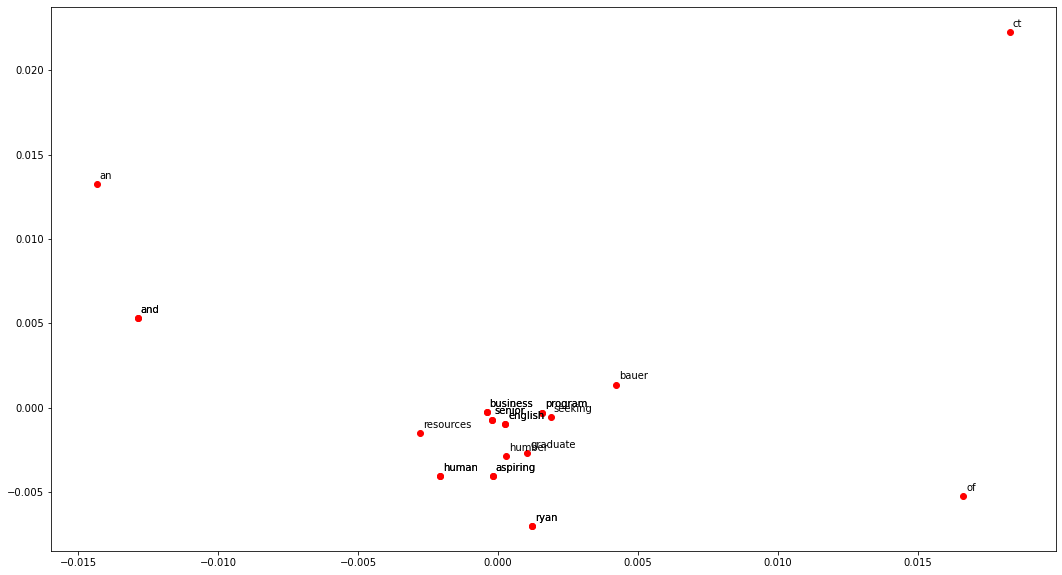

In [24]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.0001, y+0.0003), xytext=(0, 0), textcoords='offset points')

In [ ]:
# visualize the word similarities with fast text -
# sort based on connections -
# define each of the functions in a modular manner -
# supervisor signal -
# weight aspect - for consecutive search queries

#### Fast Text Recommendation

In [ ]:
# Creating the recommendation system via FastText implementaion

In [4]:
import timeit
from gensim.models import FastText

# Function to clean the text of irrelevant characters
def clean_text(headline):
    headline = re.sub("[^a-zA-Z ]", "", headline)
    return headline

# Function to prepare the corpus
def make_corpus(data):
    corpus = []
    data["job_title_clean"] = data["job_title"].apply(clean_text)
#     data["job_title_clean"] = data["job_title_clean"].str.lower()
    for sentence in data["job_title_clean"]:
        corpus.append(sentence.split())
    return corpus

# Function to generate the recommendation result
def get_recommendation(top, data, scores):
    recommendation = pd.DataFrame(columns = ['id', 'job_title',  'location','connections', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'id'] = data['id'][i]
        recommendation.at[count, 'job_title'] = data['job_title'][i]
        recommendation.at[count, 'location'] = data['location'][i]
        recommendation.at[count, 'connections'] = data['connection'][i]
        recommendation.at[count, 'score'] =  scores[count]
        count += 1
    return recommendation

# Function to clean corpus
def replace_special_char(word, toBeReplaced, void):
    for elem in toBeReplaced :
        if elem in word :
            word = word.replace(elem, void)
    return word

# Function to sort generated recommendaton based on number of connections
def connections_based_sort(recommendation):
    recommendation['connections'] = recommendation['connections'].apply(lambda x: (x.split('+')[0]))
    recommendation['connections'] = recommendation['connections'].astype(int)
    recommendation['score'] = recommendation['score'].astype(float)
    recommendation.sort_values(['score','connections'], ascending = [False, False], inplace = True)
    recommendation.loc[recommendation.connections == 500, "connections"] = "500+"
    return recommendation

# Function to generate similarity scores with fastText
def similarity_score_fastText(df, user_text, corpus, ft_model):
    simlarity_df_list = []
    search_key = user_text
    index_value = 0
    for i in df.index:
        headline = " ".join(corpus[i])
        score = ft_model.wv.n_similarity(search_key, headline)
        simlarity_df_list.append((search_key, headline, index_value, score))
        index_value += 1
    return simlarity_df_list

# Function to generate recommendation
def generate_recommendation(data, search_tag, corpus, ft_model):
    # calculate similarity score for all entries using fastText
    simlarity_ft_df = similarity_score_fastText(data, search_tag, corpus, ft_model)
    fastText_recommendation_sorted = pd.DataFrame(simlarity_ft_df).sort_values([3], ascending=False)
    fastText_recommendation_sorted = fastText_recommendation_sorted.iloc[0:output_records,:]
    fastText_recommendation_sorted.reset_index(inplace=True)
    index_ft = fastText_recommendation_sorted[2]
    list_scores = fastText_recommendation_sorted[3]
    recommendation = get_recommendation(index_ft, data, list_scores)
    recommendation = connections_based_sort(recommendation)
    return recommendation

# fastText function
def get_fastText_rec(data, corpus, ft_model):
    # obtain initial search tag
    search_tag = input("Enter targeted headline: ")
    global output_records
    output_records = input("Enter the number of recommendations you require: ")
    output_records = int(output_records)
    recommendation = generate_recommendation(data, search_tag, corpus, ft_model)
    return recommendation

In [25]:
corpus = make_corpus(data)   
# fastText implementation
start_time = timeit.default_timer()
ft_model = FastText(corpus, sg = 1)
elapsed = timeit.default_timer() - start_time
recommendation = get_fastText_rec(data, corpus, ft_model)
print("\nThe result was generated in "+ str(elapsed) +" seconds.")

Enter targeted headline: aspiring seeking human resources
Enter the number of recommendations you require: 20

The result was generated in 24.549482300004456 seconds.


In [18]:
recommendation

,id,job_title,location,connections,score
0,73,"Aspiring Human Resources Manager, seeking inte...","Houston, Texas Area",7,0.970381
1,29,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,0.934345
2,27,Aspiring Human Resources Management student se...,"Houston, Texas Area",500+,0.934345
3,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.931144
4,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,0.931144
11,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,0.928543
5,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.928543
6,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.928543
7,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.928543
8,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,0.928543


##### Supervisor Signal

In [78]:
# Incorporating a supervisor signal to pick the most favourable candidate and generate results based on thier details

In [ ]:
recommendation = get_fastText_solution(data)
recommendation

In [6]:
# Function to update recommendation
def update_recommendation(recommendation, ideal_candidate_id):
    ideal_row = recommendation.loc[recommendation['id'] == ideal_candidate_id]
#     print(ideal_row)
    new_search_tag = ideal_row['job_title'].iloc[0]
    updated_recommendation = generate_recommendation(data, new_search_tag, corpus, ft_model)
    return updated_recommendation

iteration = 0
while(iteration >= 0):
    signal = input("Do you want to change the recommendation? (y/n): ")
    if signal == 'y':
        ideal_candidate_id = int(input("\n\nEnter the ideal candidate's id: "))
        recommendation = update_recommendation(recommendation, ideal_candidate_id)
        print(recommendation)
    else:
        iteration = -1

Do you want to change the recommendation? (y/n): n


In [28]:
recommendation

##### Weighted score

In [77]:
# Allocating a 70:30 weight to the new score and old scores to generate a cumulative score

In [6]:
import pandas as pd
import re
from gensim.models import FastText

# Function to clean the text of irrelevant characters
def clean_text(headline):
    headline = re.sub("[^a-zA-Z ]", "", headline)
    return headline

# Function to prepare the corpus
def make_corpus(data):
    corpus = []
    data["job_title_clean"] = data["job_title"].apply(clean_text)
#     data["job_title_clean"] = data["job_title_clean"].str.lower()
    for sentence in data["job_title_clean"]:
        corpus.append(sentence.split())
    return corpus

# Function to generate the recommendation result
def get_recommendation(top, data, scores):
    recommendation = pd.DataFrame(columns = ['id', 'job_title',  'location','connections', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'id'] = data['id'][i]
        recommendation.at[count, 'job_title'] = data['job_title'][i]
        recommendation.at[count, 'location'] = data['location'][i]
        recommendation.at[count, 'connections'] = data['connection'][i]
        recommendation.at[count, 'score'] =  scores[count]
        count += 1
    return recommendation

# Function to sort generated recommendaton based on number of connections
def connections_based_sort(recommendation):
    recommendation['connections'] = recommendation['connections'].apply(lambda x: (x.split('+')[0]))
    recommendation['connections'] = recommendation['connections'].astype(int)
    recommendation['score'] = recommendation['score'].astype(float)
    recommendation.sort_values(['score','connections'], ascending = [False, False], inplace = True)
    recommendation.loc[recommendation.connections == 500, "connections"] = "500+"
    return recommendation

# Function to generate similarity scores with fastText
def similarity_score_fastText(df, user_text, corpus, ft_model):
    simlarity_df_list = []
    search_key = user_text
    index_value = 0
    for i in df.index:
        headline = " ".join(corpus[i])
        # calculate similarity score for all entries using fastText
        score = ft_model.wv.n_similarity(search_key, headline)
        simlarity_df_list.append([search_key, headline, index_value, score])
        index_value += 1
    return simlarity_df_list

# Function to generate recommendation
def generate_recommendation(data, search_tag, corpus, ft_model, scores_df, iteration, output_records):
    iteration += 1
    simlarity_ft_df = similarity_score_fastText(data, search_tag, corpus, ft_model)
    # scores dataframe to consider weighted scores
    temp_df = pd.concat([pd.DataFrame([simlarity_ft_df[i][3]], 
                           columns=['score'+str(iteration)]) for i in range(len(simlarity_ft_df))], ignore_index=True)
    scores_df['score'+str(iteration)] = temp_df['score'+str(iteration)]
    simlarity_ft_df = pd.DataFrame(simlarity_ft_df)
    if scores_df.shape[1] == 2:
        scores_df['weightedscore'+str(iteration-1)] = (0.7*scores_df['score'+str(iteration)])+(0.3*(scores_df['score'+str(iteration-1)]))
        simlarity_ft_df[3] = scores_df['weightedscore'+str(iteration-1)]
    elif scores_df.shape[1] > 2:
        scores_df['weightedscore'+str(iteration-1)] = (0.7*scores_df['score'+str(iteration)])+(0.3*(scores_df['weightedscore'+str(iteration-2)]))
        simlarity_ft_df[3] = scores_df['weightedscore'+str(iteration-1)]
        
    fastText_recommendation_sorted = simlarity_ft_df.sort_values([3], ascending=False)
    fastText_recommendation_sorted = fastText_recommendation_sorted.iloc[0:output_records,:]
    fastText_recommendation_sorted.reset_index(inplace=True)
    index_ft = fastText_recommendation_sorted[2]
    list_scores = fastText_recommendation_sorted[3]
    recommendation = get_recommendation(index_ft, data, list_scores)
    recommendation = connections_based_sort(recommendation)
    return recommendation, iteration, scores_df

# Function to update recommendation
def update_recommendation(data, recommendation, ideal_candidate_id, scores_df, iteration, output_records):
    ideal_row = recommendation.loc[recommendation['id'] == ideal_candidate_id]
    new_search_tag = ideal_row['job_title'].iloc[0]
    updated_recommendation, iteration, scores_df = generate_recommendation(data, new_search_tag, corpus, ft_model, scores_df, iteration, output_records)
    return updated_recommendation, iteration, scores_df


In [7]:
data = pd.read_csv("D:\\Apziva\\potential-talents.csv")
iteration = 0
while(iteration >= 0):
    if iteration == 0:
        search_tag = str(input("Enter targeted headline: "))
        output_records = int(input("Enter the number of recommendations you require: "))
        corpus = make_corpus(data)
        ft_model = FastText(corpus, sg = 1)
        scores_df = pd.DataFrame()
        recommendation, iteration, scores_df = generate_recommendation(data, search_tag, corpus, ft_model, scores_df, iteration, output_records)
        print("Recommended candidates:\n\n", recommendation)
    else:
        signal = input("Do you want to change the recommendation? (y/n): ")
        if signal == 'n':
                iteration = -1
        elif signal != 'y':
            continue
        else:
            ideal_candidate_id = int(input("\n\nEnter the ideal candidate's id: "))
            recommendation, iteration, scores_df = update_recommendation(data, recommendation, ideal_candidate_id, scores_df, iteration, output_records)
            print("Recommended candidates:\n\n", recommendation)

Enter targeted headline: aspiring seeking human resources
Enter the number of recommendations you require: 20
Recommended candidates:

     id                                          job_title  \
0   73  Aspiring Human Resources Manager, seeking inte...   
1   29  Aspiring Human Resources Management student se...   
2   27  Aspiring Human Resources Management student se...   
3   82  Aspiring Human Resources Professional | An ene...   
4   72  Business Management Major and Aspiring Human R...   
5   66  Experienced Retail Manager and aspiring Human ...   
12  97              Aspiring Human Resources Professional   
6   17              Aspiring Human Resources Professional   
7   46              Aspiring Human Resources Professional   
8   58              Aspiring Human Resources Professional   
9   21              Aspiring Human Resources Professional   
10  33              Aspiring Human Resources Professional   
11   3              Aspiring Human Resources Professional   
14  49    